# <center>INFO 634 – Data Mining</center>
## <center>Project Report</center>
### <center>Instacart Basket Analysis</center>

### Group Members:

•	Hong, Richard - rh824@drexel.edu

•	Navuluru, Soujanya - sn863@drexel.edu

•	Pulagam, Nandakishor Reddy - np689@drexel.edu

•	Velagapudi, Nirupam Kumar - nkv27@drexel.edu


### Introduction:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Market Basket Analysis is a technique used by online retailers to analyze the pattern of purchasing items. Here, we are using Instacart as our online retail store and understanding the customer's behavior while purchasing. This analysis helps us in suggesting similar items, related items which are already added in the cart. Options like "frequently bought items" and "based on your purchase" on Instacart our analysis would help identify these items.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this project, we would like to understand and assist Instacart in using the transactions data of their customer, analyze the retail items acquiring patterns like items or products which are bought together. We also would like to visualize the data to provide better recommendations, which will help increase the retailer's revenue and customer satisfaction.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our dataset has multiple files and variables which contain details about products, aisles, department, and customer orders. We also have a variable showing if the current product was previously ordered by the customer or showing us a timeline of the product purchase. Further, this project will help Instacart or any online retailers in personalizing user profiles with recommendations based on the analysis and increase customer experience and plan strategy for online retailers for high revenue.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In today's era, the necessity for innovation over internet purchases is in high demand. As per Instacart, in 2017, there have been 3 million Instacart orders, which have increased in the following years. There are many types of research in progress to meet customers' expectations and their requirements. For proceeding with our project, understanding the transaction and order details of each customer is a must to increase the sales of similar products or products which are bought together. Mainly in retail stores, this could be acquired by understanding the pattern of purchases of the customer and finding out the related items with the help of items which are already bought and then to find the support, confidence and lift matrix for the item set to check which items have better metrics to proceed further.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data mining method which we have selected for our project is Algorithm Implementation. We are exploring methods like Data cleaning, Data integration, Data selection, Data transformation, Data mining, Pattern evaluation, Knowledge representation. We initially thought of evaluating the association patterns about the items being purchased using Apriori algorithm; however, we have decided to proceed with our own approach in building the apriori algorithm, which is very similar to ML Apriori algorithm in python.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We have chosen our own approach as our dataset is huge, and MLxtend apriori algorithm is very slow to handle such large datasets. For us, this is a great learning and in-depth understanding of the functioning of Apriori algorithm. We have also observed that python generators are very efficient in handling large datasets, which leads us to recreate the Apriori algorithm logic using Python generators.

### Dataset and Insights:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The dataset which we are using for the current project has been taken from the Kaggle website. The dataset consists of multiple files that are related to each other and contains customers' orders over time. The dataset contains more than 3 million grocery orders which have been ordered by more than 200,000 Instacart users. The details about each file and the attributes follow below. The link for the datset https://www.kaggle.com/c/instacart-market-basket-analysis/data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A total of 4 datasets are used in this project, which contains information on customer orders and transaction details.

##### Dataset 1: aisles.csv

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;These files contain information based on the aisles in the Instacart website, using which the products will be organized. This dataset includes 134 Aisle IDs and their names.

|  Variables    |Description       |
|------|--------|
|aisle_id     | Id of each aisles      |
|aisle     | Describes the aisles in the retail stores     |


##### Dataset 2: departments.csv

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This file contains information about the departments to which the products belong to and their respective IDs. This dataset contains 21 Department IDs and their names.

|  Variables    |Description       |
|------|--------|
|department_id     | Each Deparment ID      |
|department     | Describes the departments in the retail stores     |


##### Dataset 3: products.csv

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This file contains information about the products available in the Instacart and describes the product ID, product name, aisle, and departments. This dataset contains 49677 unique products and four attributes.


|  Variables    |Description       |
|------|--------|
|product_id     | IDs of the products ordered by the customer    |
|product_name     | Names of the products ordered by customer     |
|aisle_id    | Describes to which Aisles the product belongs to      |
|department_id     | Describes to which department the product belongs to  |


##### Dataset 4: Order_Products_prior.csv

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This file contains information about the orders of the customers, products in the orders, if the item is added to cart and if the order has been ordered previously. This dataset contains 32434489 instances and four attributes.

|  Variables    |Description       |
|------|--------|
|order_id     | IDs of the orders given by the customer    |
|product_id     | IDs of the products ordered by customer     |
|add_to_cart_order    | In which order the item has been added to cart      |
|reordered     | If the Item has been ordered previously it is 1 if not 0     |

In [3]:
# Importing modules required for the project

import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

###  Data Preprocessing and Data cleaning

#### A. Load data

In [4]:
orders = pd.read_csv('data/order_products__prior.csv')
products = pd.read_csv('data/products.csv')

#### B. General informations

> About the orders data

In [5]:
## print the dimension of the orders data
orders.shape

(32434489, 4)

In [6]:
## General informations of the orders data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [7]:
# Number of product types in the orders data
len(set(orders.product_id.unique()))

49677

In [8]:
# Number of orders
print("Total number of orders are: " , orders['order_id'].nunique())

Total number of orders are:  3214874


> About the products data

In [9]:
## print the dimension of the products data
products.shape

(49688, 4)

In [10]:
## General informations of the products data
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
## Number of department. 21 departments were found.
set(products.department_id.unique())

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}

In [12]:
# Number of product types in the products data. 
len(set(products.product_id.unique()))

49688

> The products data has 49688 items. Among them, 49677 items were used in the order data.

In [13]:
# Checking duplicated values
products.product_name.is_unique

True

In [14]:
# Checking duplicated values
products.product_id.is_unique

True

> There is no duplicate product name and product id.

#### C. Descriptive analysis

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Attributes of this data have numeric variables. Although Pandas "describe" method can provide basic statistics for numeric variables, that doesn't mean the statistics would always provide meaningful results. The "order_id" attribute and the "product_id" attribute are nominal types. Statistics of these attributes are ineffectual. The "add_to_cart_order" attribute is an ordinal type. So the statistics of the "add_to_cart_order" attribute don't seem to have a distinctive interest because it is just "order in which each product was added to cart."(https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b) The "reordered" attribute is a binary type. However, the statistics of the "reordered" attribute state that about 58% of products were reordered by someone who bought it in the past. In this data, there is no numeric type attribute. 

In [15]:
orders.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The below NumPy method shows the number of tuples per attribute that has missing values. The data doesn't have a missing value.


In [16]:
print(orders.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


>  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The plot below shows reordered items are about 30% more than single ordered items. The "reordered" attribute is a binary type, so the X-axis of the plot has only 0 and 1 values.

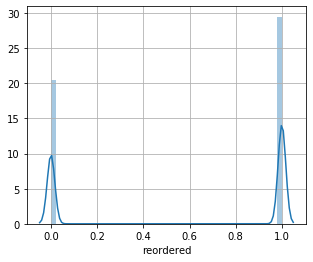

In [17]:
plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams['axes.grid'] = True 
sns.distplot(orders["reordered"])

>  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The plots below indicates most buyers buy less than 20 items, and buyers who bought more than about 25 items are distinguished as outliers.



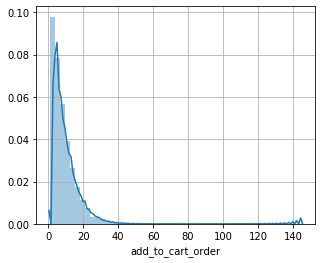

In [18]:
plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams['axes.grid'] = True 
sns.distplot(orders["add_to_cart_order"])

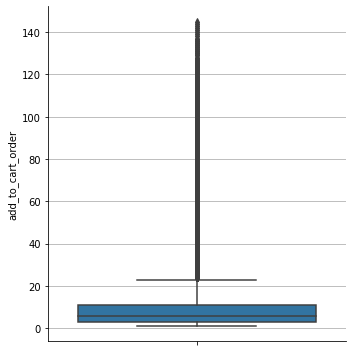

In [19]:
sns.catplot(data=orders, y='add_to_cart_order', kind='box')

#####  - Outlier Detection

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Using Z-score, We tried to identify outliers. The below numbers represent Z-scores of the orders data. We set a threshold as 3, which can exclude 0.3% of data.

In [20]:
z = np.abs(stats.zscore(orders))
print(z)

[[1.73275128 0.53513719 1.03148798 0.83413716]
 [1.73275128 0.24180589 0.89117001 0.83413716]
 [1.73275128 1.15270598 0.75085204 1.19884361]
 ...
 [1.73233394 1.48803295 0.0492622  1.19884361]
 [1.73233394 0.05138352 0.09105576 0.83413716]
 [1.73233394 1.45823872 0.23137373 0.83413716]]


> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first array of the below arrays represent the list of row numbers. The second array of the below arrays describes the list of corresponding column numbers with a Z-score higher than 3. We could discover only the column numbers 2, which is the "add_to_cart_order" attribute, has Outliers.

In [21]:
threshold = 3
print(np.where(z > 3))

(array([     956,      957,      958, ..., 32434143, 32434273, 32434274],
      dtype=int64), array([2, 2, 2, ..., 2, 2, 2], dtype=int64))


In [22]:
set((np.where(z > 3))[1])

{2}

In [23]:
# Numbers of outliers
len((np.where(z > 3))[0])

536786

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As we could expect from the box plot above, many outliers have been detected. However, in this case, it seems that there is no need to distinguish them by outliers because the "add_to_cart_order" attribute is an ordinal type.

#####  - Checking redundancies

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We examined the redundancies of the orders data by applying correlation analysis. We applied a heatmap to visualize the correlation coefficients. In the heat map, a more robust red color intends a stronger correlation, and a lighter color indicates a weaker correlation. We couldn't find any strong correlation. These results represent there is no redundancy in attributes.

In [24]:
pcorr = orders.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
pcorr

,order_id,product_id,add_to_cart_order,reordered
order_id,1.000000,-0.000082,-0.000320,-0.000253
product_id,-0.000082,1.000000,0.005529,0.003718
add_to_cart_order,-0.000320,0.005529,1.000000,-0.133024
reordered,-0.000253,0.003718,-0.133024,1.000000


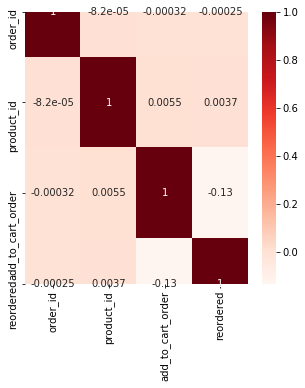

In [25]:
plt.figure(figsize=(5,5))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

### Association Rules Mining

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Association rule mining is a process of analyzing transactional data of orders given by the customers to find relations/ association between two different items. Best example for association rules mining is market basket analysis. Based on the rules and the metrics, the retailers can develop marketing skills to allign the items in the retails stores. These rules could also lead to building a recommender system for online shopping market.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are 3 key metrics that has to be taken into consideration while evaluating the association rules:

1. <b>support</b> 

    Support is defined as the probability of how frequent the items occurs in the dataset.

$$ support (A) =  P(A) $$

    
2. <b>confidence</b>  

    Confidence is defined as the conditional probability of event to happen given, an event which already occured prior. Confidence of A⇒B is ratio of support of AUB to that of support of A.
    
$$ confidence (A⇒B) =  P(B|A) = \frac{support(AUB)}{support(A)} $$
    
3. <b>lift</b>  
    
    Lift of A and B is given as ration of Confidence of A-B to that of support of B.
    
$$ Lift (A,B) = \frac{Confidence(A⇒B)}{Support(B)} = \frac{Support(AUB)}{Support(A)×Support(B)} $$
    
    In summary, lift can take on the following values:
    
        * If lift = 1 implies there is no relationship between A and B. 
          (A and B are independent items and occur together only by chance)
      
        * If lift > 1 implies that there is a positive relationship between A and B.
          (A and B occur together more frequently and are dependent on each other. Higher the lift, more they are dependent)
    
        * If lift < 1 implies that there is a negative relationship between A and B.
          (A and B occur together less frequently though they are dependent on each other.)





In [26]:
# Returns frequency1 table for each product
def freq1_table(orders):
    product_freq = dict(orders['product_id'].value_counts())
    df = pd.DataFrame(list(product_freq.items()), columns = ['product_id','frequency'])
    df['support'] = df['frequency']/orders['order_id'].nunique()
    return df

In [27]:
frequency1 = freq1_table(orders)
# Replace item ID with item name and display
frequency1_table = frequency1.merge(products[['product_id','product_name']],  left_on='product_id', right_on='product_id')
frequency1_table = frequency1_table.drop(['product_id'], axis = 1)
frequency1_table = frequency1_table[['product_name','frequency','support']]
frequency1_table.head()

,product_name,frequency,support
0,Banana,472565,0.146993
1,Bag of Organic Bananas,379450,0.118030
2,Organic Strawberries,264683,0.082331
3,Organic Baby Spinach,241921,0.075251
4,Organic Hass Avocado,213584,0.066436


In [28]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

In [29]:
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))                         

In [30]:
# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair

In [31]:
# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))

In [32]:
#Association rules function
def association_rules(order_item, min_support):

    # Calculate item frequency and support
    item_stats = freq(order_item).to_frame("freq")
    item_stats['support'] = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items = item_stats[item_stats['support'] >= min_support].index
    order_item = order_item[order_item.isin(qualifying_items)]

    # Filter from order_item orders with less than 2 items
    order_size = freq(order_item.index)
    qualifying_orders = order_size[order_size >= 2].index
    order_item = order_item[order_item.index.isin(qualifying_orders)]

    # Recalculate item frequency and support
    item_stats = freq(order_item).to_frame("freq")
    item_stats['support'] = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    # Filter from item_pairs those below min support
    item_pairs = item_pairs[item_pairs['supportAB'] >= min_support]

    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift'] = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [33]:
# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [34]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders_products = orders.set_index('order_id')['product_id'].rename('item_id')

In [35]:
%%time
rules = association_rules(orders_products, 0.01)  

C:\Users\12678\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Wall time: 9min 31s


In [36]:
# Replace item ID with item name and display association rules
item_name   = products.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
rules_final.head()

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306,0.010155,1163,0.038595,839,0.027843,0.263113,0.364720,9.449868
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,318,0.010553,1809,0.060033,879,0.029170,0.175788,0.361775,6.026229
3,Organic Fruit Yogurt Smoothie Mixed Berry,Apple Blueberry Fruit Yogurt Smoothie,349,0.011582,1518,0.050376,1249,0.041449,0.229908,0.279424,5.546732
9,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409,0.013573,1666,0.055288,1391,0.046162,0.245498,0.294033,5.318230
10,Organic Grapefruit Ginger Sparkling Yerba Mate,Cranberry Pomegranate Sparkling Yerba Mate,351,0.011648,1731,0.057445,1149,0.038131,0.202773,0.305483,5.317849


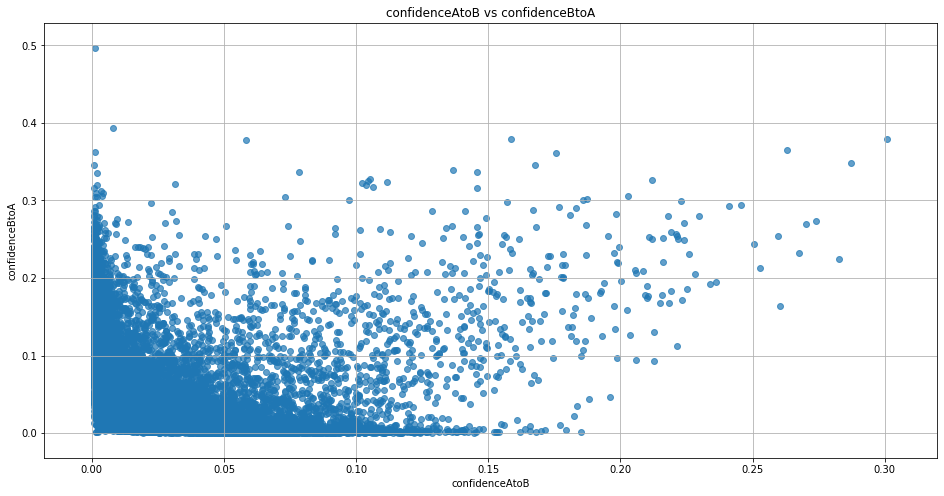

In [37]:
#Scattor plot for confidenceAtoB vs confidenceBtoA
plt.figure(figsize=(16,8))
plt.scatter(rules_final['confidenceAtoB'], rules_final['confidenceBtoA'], alpha=0.7)
plt.xlabel('confidenceAtoB')
plt.ylabel('confidenceBtoA')
plt.title('confidenceAtoB vs confidenceBtoA')
plt.show()

In [38]:
rules_final[rules_final['lift'] > 1]

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306,0.010155,1163,0.038595,839,0.027843,0.263113,0.364720,9.449868
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,318,0.010553,1809,0.060033,879,0.029170,0.175788,0.361775,6.026229
3,Organic Fruit Yogurt Smoothie Mixed Berry,Apple Blueberry Fruit Yogurt Smoothie,349,0.011582,1518,0.050376,1249,0.041449,0.229908,0.279424,5.546732
9,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409,0.013573,1666,0.055288,1391,0.046162,0.245498,0.294033,5.318230
10,Organic Grapefruit Ginger Sparkling Yerba Mate,Cranberry Pomegranate Sparkling Yerba Mate,351,0.011648,1731,0.057445,1149,0.038131,0.202773,0.305483,5.317849
...,...,...,...,...,...,...,...,...,...,...,...
4794,Organic Stage 4 Spinach Mango & Pear Baby Food,"Sweeet Potato, Apple, Carrot & Cinnamon Organi...",468,0.015531,4009,0.133042,3445,0.114326,0.116737,0.135849,1.021096
5858,Organic Whole Milk Strawberry Beet Berry Yogur...,Blueberry Whole Milk Yogurt Pouch,1040,0.034513,6272,0.208142,4917,0.163175,0.165816,0.211511,1.016186
4831,Stage 1 Apples Sweet Potatoes Pumpkin & Bluebe...,Stage 1 Apples & Strawberries Organic Pureed B...,605,0.020077,5577,0.185078,3218,0.106792,0.108481,0.188005,1.015815
8222,Organic Whole Milk Strawberry Beet Berry Yogur...,Yotoddler Organic Pear Spinach Mango Yogurt,1290,0.042810,6272,0.208142,6121,0.203131,0.205676,0.210750,1.012528


### Conclusion:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; As per the output obtained in the association rule mining, we could observe that the top associations are turned out to be as expected, similar items with different flavor are being purchased together(e.g., Organic Strawberry Chia Lowfat 2% Cottage Cheese with Organic Cottage Cheese Blueberry Acai Chia, Chicken Cat Food with Turkey Cat Food, etc.). With these association rules obtained, Instacart could recommend the 2nd item to users who have purchased the 1st item based on high lift value and confidence. The items which have lift value more than one/ positive relationship could be recommended to users as well as they could be aligned together in the display of orders, which would increase the sales of retailers.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;__Our python generated apriori algorithm as given the result within 10min for over 30 million instances of data, which would generate rules for over 45000 products. This is much faster when compared to the result of MLxtend Apriori algorithm, which gave us Memory error while trying to obtain the rules.__

### Future work:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Further to our analysis, there is a possibility of finding the rules with respect to departments and recommendations could be made for each department.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are many products with similar names and are of a different brand. We could also combine all the similar name products and find out the rules for those products with other departmental products. This would reduce the redundancy in the number of products.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Further to the association rule mining, we could also proceed with predictions on items that users might order. There are different approaches in predictions from which we could choose collaborative and content-based filtering in predicting the items which the user might order in the future.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The algorithm we have written is suitable for 2 item combinations, which could be extended to 3 or 4 frequency itemsets in the future.